# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data  science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from Cleavland data from UCI ML Repository
https://archive.ics.uci.edu/ml/datasets/Heart+Disease

There is also a version of it available on Kaggle


## 3. Evaluation

> If we can reach 95% accuracy at predicting whetehr or not a patient has heart disease during the proof of concept , we'll pursue the project

## 4. Features

Doing your own research or asking for the experts.

 **create data dictionary**

* Age
* Sex : male : 1
female : 0

* chest pain type
** Value 1: typical angina
** Value 2: atypical angina
** Value 3: non-anginal pain
** Value 4: asymptomatic

* resting blood pressure (in mm Hg on admission to the hospital

* serum cholestoral in mg/dl

* (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

* resting electrocardiographic results

-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

* thalach: maximum heart rate achieved

* exercise induced angina (1 = yes; 0 = no)

Angina is chest pain or discomfort caused when your heart muscle doesn't get enough oxygen-rich blood.
It may feel like pressure or squeezing in your chest.

oldpeak = ST depression induced by exercise relative to rest

* slope: the slope of the peak exercise ST segment

--Value 1: upsloping
-- Value 2: flat
-- Value 3: downsloping

vessels colored by flourosopy : number of major vessels (0-3) colored by flourosopy

A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

* Target : 0 No Heart disease
1 Heart disease



## Preparing the tools

We're going to use pandas, matplotlib and numpy for data analysis and manipulation

In [1]:
#Import all tools we need

#Regular EDA (explo data analysis) and plotting libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#we want plots to appear inside the notebook
%matplotlib inline 

#models from scikit-learn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


#models evaulations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, auc



## Load Data

In [33]:
pip install --upgrade scikit-learn

                                              0.0/10.6 MB ? eta -:--:--
                                              0.1/10.6 MB 1.5 MB/s eta 0:00:07
                                              0.2/10.6 MB 2.0 MB/s eta 0:00:06
     -                                        0.4/10.6 MB 2.5 MB/s eta 0:00:05
     --                                       0.8/10.6 MB 3.8 MB/s eta 0:00:03
     -----                                    1.4/10.6 MB 5.4 MB/s eta 0:00:02
     -------                                  2.1/10.6 MB 7.4 MB/s eta 0:00:02
     -------                                  2.1/10.6 MB 7.4 MB/s eta 0:00:02
     --------                                 2.1/10.6 MB 5.7 MB/s eta 0:00:02
     ---------                                2.5/10.6 MB 6.1 MB/s eta 0:00:02
     -----------                              3.2/10.6 MB 6.7 MB/s eta 0:00:02
     ------------                             3.2/10.6 MB 6.6 MB/s eta 0:00:02
     -------------                            3.5/10.6 MB 6

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Prasad\\AppData\\Local\\Programs\\Python\\Python310\\Lib\\site-packages\\~klearn\\.libs\\msvcp140.dll'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.1 -> 24.0
[notice] To update, run: C:\Users\Prasad\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [36]:
!C:\Users\Prasad\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


                                              0.0/2.1 MB ? eta -:--:--
                                              0.0/2.1 MB 653.6 kB/s eta 0:00:04
     --                                       0.1/2.1 MB 1.4 MB/s eta 0:00:02
     ------                                   0.3/2.1 MB 2.2 MB/s eta 0:00:01
     -----------                              0.6/2.1 MB 3.2 MB/s eta 0:00:01
     ---------------------                    1.1/2.1 MB 4.7 MB/s eta 0:00:01
     ------------------------------------     1.9/2.1 MB 7.3 MB/s eta 0:00:01
     ---------------------------------------  2.1/2.1 MB 6.4 MB/s eta 0:00:01
     ---------------------------------------- 2.1/2.1 MB 5.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1
    Uninstalling pip-23.1:
      Successfully uninstalled pip-23.1


In [2]:
import sklearn
print(sklearn.__version__)

1.4.1.post1


In [ ]:
#!pip uninstall scikit-learn
#!pip install scikit-learn==1.3.1

In [2]:
df=pd.read_csv("heart-disease.csv")

In [3]:
df.shape

(303, 14)

## Data exploration (EDA)

The goal is to find about data and become a subject matter export on the dataset you're working with.

1. What que are you trying to solve
2. What kind of data we have and how do we treat diff types
3. Whta's missing from data and how you deal with it?
4. Where are the outliers and why should we care about them ?
5. How can you add, change or remove features to get more out of your data?


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
# let's find out how may of each classes are
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

<Axes: >

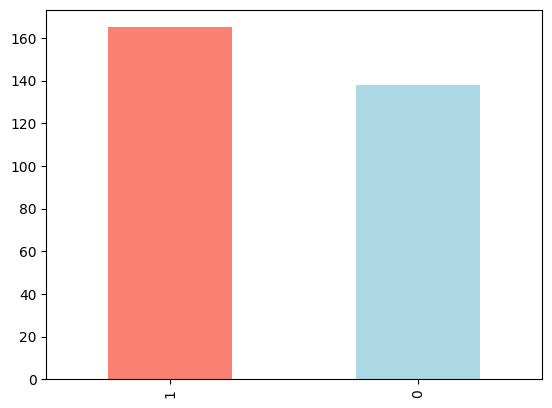

In [7]:
df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
#missing values

df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart disease freq acc to sex

In [11]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [12]:
# compare target col with sex column

pd.crosstab(df.target,df.sex)


sex,0,1
target,,
0,24,114
1,72,93


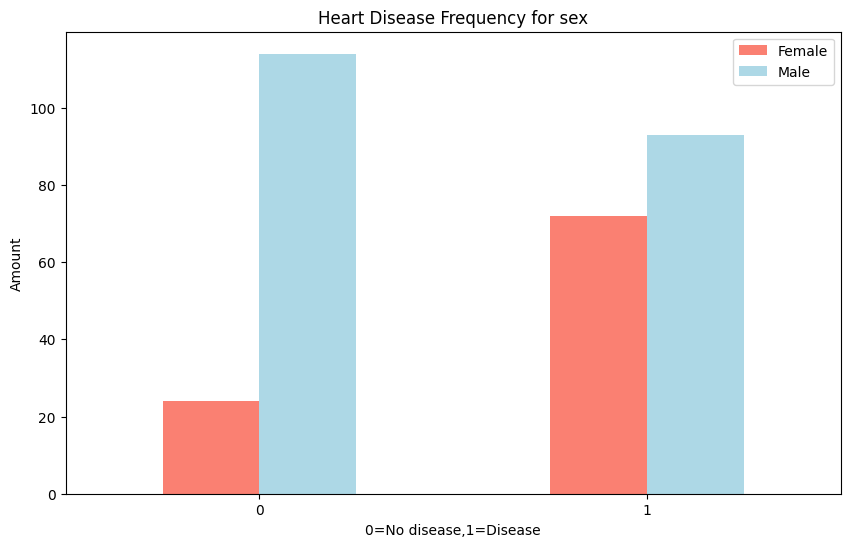

In [13]:
#create plot of it
pd.crosstab(df.target,df.sex).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["salmon","lightblue"])
plt.title("Heart Disease Frequency for sex")
plt.xlabel("0=No disease,1=Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

In [14]:
#max heart heart 
df["thalach"].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

### Age vs Max heart rate for heart disease

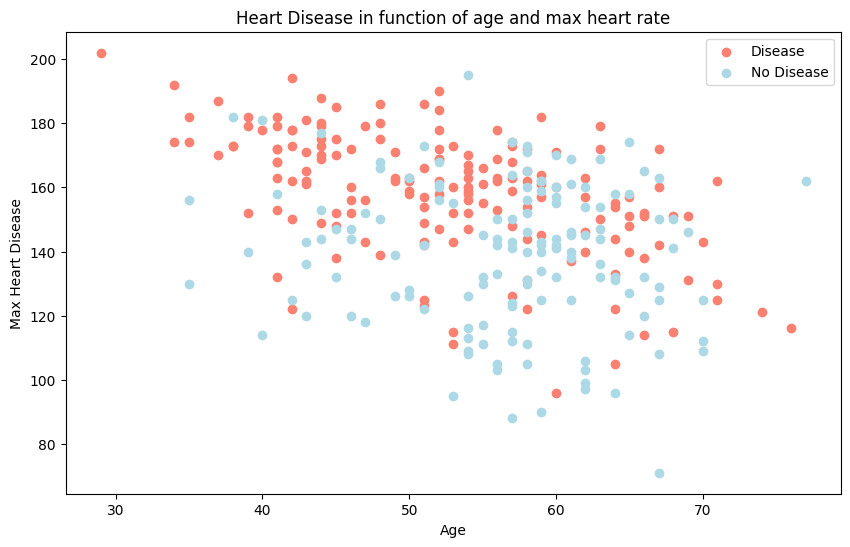

In [15]:
# create a fig

plt.figure(figsize=(10,6))

#scatter with positive eg
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="salmon")

#scatter with negative eg
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="lightblue")

#add some helpful info
plt.title("Heart Disease in function of age and max heart rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Disease")
plt.legend(["Disease","No Disease"]);

In [16]:
df.age[df.target==1]

0      63
1      37
2      41
3      56
4      57
       ..
160    56
161    55
162    41
163    38
164    38
Name: age, Length: 165, dtype: int64

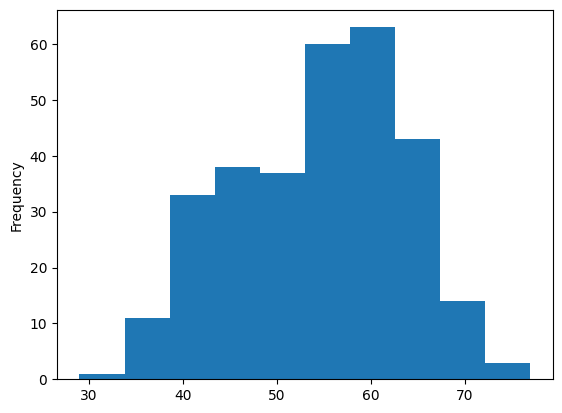

In [17]:
# check the distribution of age column with a histogram
df.age.plot.hist();

### Heart Disease Frequency per chest pain type

    Value 1: typical angina
    Value 2: atypical angina
    Value 3: non-anginal pain
    Value 4: asymptomatic

In [18]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


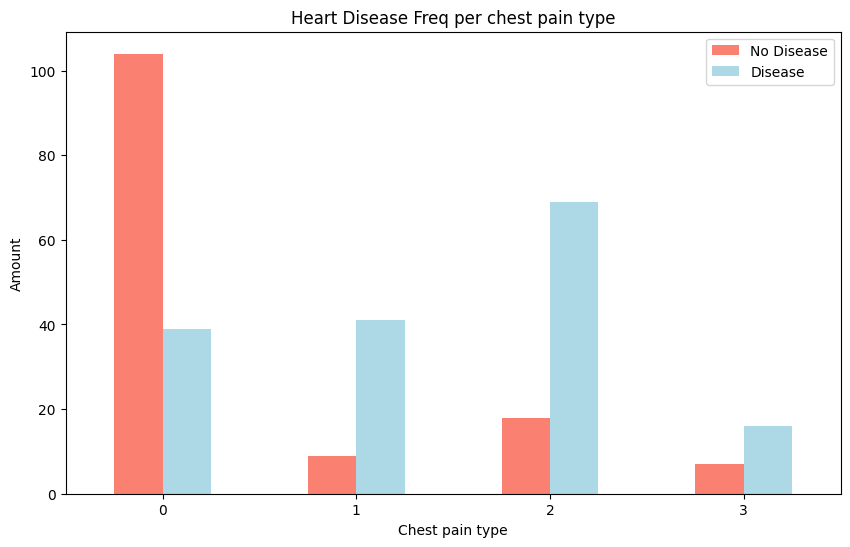

In [19]:
# make the crosstab more visual

pd.crosstab(df.cp,df.target).plot(kind="bar",
                                 figsize=(10,6),
                                 color=["salmon","lightblue"])

#add some communication
plt.title("Heart Disease Freq per chest pain type")
plt.xlabel("Chest pain type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0);

In [20]:
# make a correlation matrix

df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


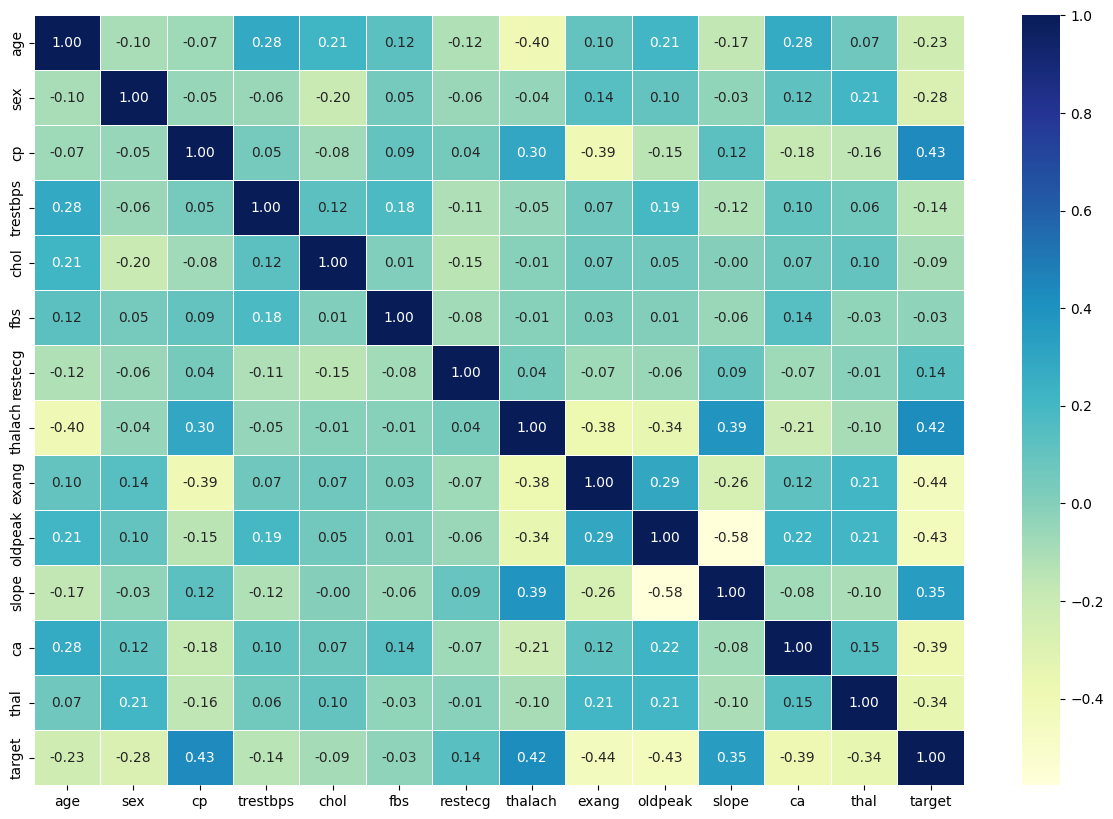

In [21]:
#let's make our correlation matrix a little prettier


corr_matrix =df.corr()
fig,ax =plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidth=0.5,
              fmt=".2f",
              cmap="YlGnBu")

## 5. Modelling

In [22]:
#split data into x and y

x=df.drop("target",axis=1)

y=df["target"]

In [23]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [24]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [25]:
# split datd into train and test sets

np.random.seed(42)

#split into train and test set
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2)

In [26]:
y_train,len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

In [27]:
# put models in a dict
models={"Logistic Regression":LogisticRegression(),
       "KNN":KNeighborsClassifier(),
       "Random Forest":RandomForestClassifier()}
        
        
#create  a function to fit and score models

def fit_and_score(models,x_train,x_test,y_train,y_test):
    """
    Fits and evaluates given ML models
    models:a dict of diff Scikit-learn ml modelsrandom 
    x_train:training data(no labels)
    x_test : testing data(no labels)
    y_train: training labels
    y_test: test labels
    
    
    """
    
    #set random seed 
    np.random.seed(42)
    
    #make dict to keep model scores
    model_scores={}
    
    #loop through models
    for name,model in models.items():
        #fit model to data
        model.fit(x_train,y_train)
        
        #evaluate model and append its score to model_score
        model_scores[name] =model.score(x_test,y_test)
        
     
    return model_scores

In [28]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='sag')  # Try a different solver

In [29]:
model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,  # Check if this is supposed to be here
                             y_test=y_test)
model_scores

C:\Users\Prasad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model comparision



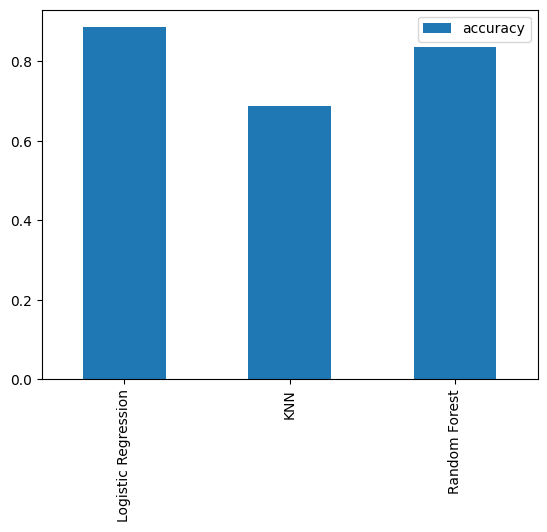

In [30]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();

Now we've got baseline model... and we know a model's first preds aren't always
what we should based our next steps off

What should we do ?

Let's look at following:

* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC Curve
* Area under curve (AUC)

### Hyperparameter Tuning


In [31]:
# let's tune KNN

train_scores=[]
test_scores=[]

#create list of diff values for n_neighbors
neighbors=range (1,21)

#setup KNN instance
knn=KNeighborsClassifier()

#loop through diff n_neigbours
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # fit the algo
    knn.fit(x_train,y_train)

    #update training scores list
    train_scores.append(knn.score(x_train,y_train))
    
    #update test scores list
    test_scores.append(knn.score(x_test,y_test))

In [32]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [33]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on test data:75.41


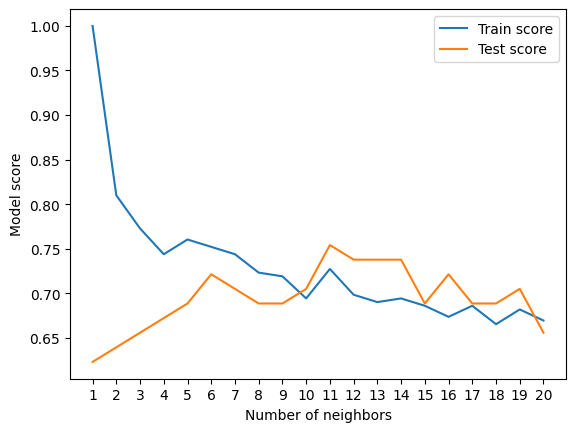

In [34]:
plt.plot(neighbors,train_scores,label="Train score")
plt.plot(neighbors,test_scores,label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on test data:{max(test_scores)*100:.2f}")

## Hyperparamters tuning with RandomizedSearchCV

We're going to tune:
* Logistic regression
* Random forest classifier

...using RandomizedSearchCV 

In [35]:
# Create a hyperparameter grid for Logistic Regression

log_reg_grid={"C":np.logspace(-4,4,20),
              "solver":["liblinear"]}

#create a hyperparameter grid for RandomForestClassifier
rf_grid={"n_estimators":np.arange(10,1000,50),
       "max_depth":[None,3,5,10],
       "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf":np.arange(1,20,2)}

Now we've got hyperparametrs grids set up for each of our models ,let's tune them using RandomizedSearchCV...



In [36]:
#tune logistic regression

np.random.seed(42)

#setup random hyperparameter search for logistic regression

rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                             param_distributions=log_reg_grid,
                             cv=5,
                             n_iter=20,
                             verbose=True)

#fit random hyperparamter search model for logistic regression
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [37]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [38]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

Now we'bve tuned logistic regression() , let's do same for RandomForestClassifier


In [39]:
#setup random seed

np.random.seed(42)

rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                         param_distributions=rf_grid,
                         cv=5,
                         n_iter=20,
                         verbose=True)

#Fit random hyper parameter search model for RandomForestClassifier
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [40]:
#find the best hyper parameters\

rs_rf.best_params_


{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [41]:
#evaulate RandomizedSearch Random search classifier model
rs_rf.score(x_test,y_test)

0.8688524590163934

In [42]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

1. by hand
2. RandomizedSearchCV
3. Grid SearchCV

## Hyperparameter Tuning with GridSearchCV

Since our Logistic Regression model provides the best scores so far, we'll try and improve them again using GridSearchCV

In [43]:
# Different hyperparameters for our logistic Regression model

log_reg_grid ={"C":np.logspace(-4,4,30),
              "solver":["liblinear"]}

#setup grid hyperparameters search for logistic regression

gs_log_reg = GridSearchCV (LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

#fit grid hyperparameter search model
gs_log_reg.fit(x_train,y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [44]:
#check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [45]:
# evaulate grid search logistic regression model

gs_log_reg.score(x_test,y_test)

0.8852459016393442

## Evaluating our tuned ml classifier , beyond accuracy

* ROC Curve and AUC Curve
* Confusion matrix
* Classifiaction report
* Precision
* Recall
* F1 score

... and it would be great if cross-validation was used where possible  .

To make comparisions and evaluate our trained model, first we need to make predictions

In [46]:
# make preds with tubned model

y_preds=gs_log_reg.predict(x_test)

In [47]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [48]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

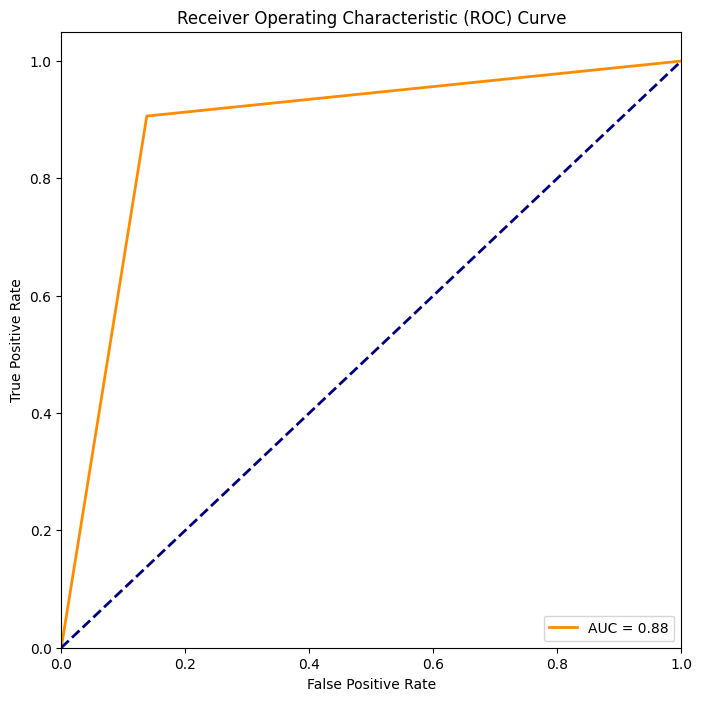

In [49]:
# plot roc curve and calculate AUC matric

fpr, tpr, thresholds = roc_curve(y_test, y_preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [50]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_preds)

0.8841594827586207

In [51]:
# confusion matrix

print( confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


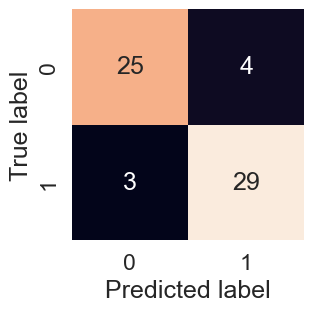

In [52]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    """
    Plots a nice looking confusion matrix using seaborn's heatmap()
    """
    
    fig,ax =plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                   annot=True,
                   cbar=False,
                  )
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
   # bottom,top =ax.get_ylim()
   #ax.set_ylim(bottom+0.5,top-0.5)   # for making sure numbers are perfectly 
                                      # aligned
    
plot_conf_mat(y_test,y_preds)    
    

Classification report 

In [53]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaulationb metrics using cross-validation

We're going to calculate recall,precsion,F1 score using cross-validation using `cross_val_score`

In [54]:
#check hyperparameters

gs_log_reg.best_params_


{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [55]:
#create new classifier
clf=LogisticRegression(C= 0.20433597178569418,
                      solver= 'liblinear')

In [56]:
#cross validated accuarcy
cv_acc=cross_val_score(clf,
                      x,
                      y,
                      cv=5,
                      scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [58]:
cv_acc=np.mean(cv_acc)
cv_acc

0.8446994535519124

In [62]:
#cross-val precision
cv_precision=cross_val_score(clf,
                            x,
                            y,
                            cv=5,
                            scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8207936507936507

In [64]:
#cross-val recall
cv_recall=cross_val_score(clf,
                            x,
                            y,
                            cv=5,
                            scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

0.9212121212121213

In [65]:
#cross-val f1 score
cv_f1=cross_val_score(clf,
                            x,
                            y,
                            cv=5,
                            scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1

0.8673007976269721

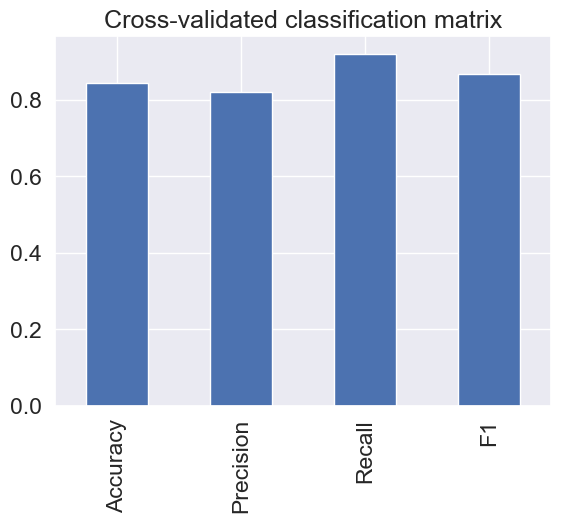

In [70]:
#visualize cross-validated metrics

cv_metrics =pd.DataFrame({"Accuracy":cv_acc,
                         "Precision":cv_precision,
                         "Recall":cv_recall,
                         "F1":cv_f1},
                        index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification matrix",
                      legend=False);

### Features importance

Feature importance is another as asking , "which features contributed most to the outcomes of the model and how did they contribute ?"

One way to find it is search for (MODEL NAME ) feature importance

Finding feature importance is diff for each ML model.

In [71]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [72]:
# fit an instance of Logistic Regression

clf= LogisticRegression(C= 0.20433597178569418,
                        solver= 'liblinear')

clf.fit(x_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [73]:
#check coef_
clf.coef_

array([[ 0.00316728, -0.86044626,  0.66067051, -0.01156993, -0.00166374,
         0.04386115,  0.31275826,  0.02459361, -0.60413065, -0.5686282 ,
         0.45051623, -0.63609885, -0.67663373]])

In [75]:
#match coef's of features to columns

feature_dict =dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0031672775125744686,
 'sex': -0.8604462617531493,
 'cp': 0.6606705112737149,
 'trestbps': -0.011569930915493508,
 'chol': -0.0016637441846093658,
 'fbs': 0.04386114942757081,
 'restecg': 0.3127582620910283,
 'thalach': 0.02459361246994142,
 'exang': -0.6041306524707951,
 'oldpeak': -0.568628196677622,
 'slope': 0.4505162332451247,
 'ca': -0.636098853689775,
 'thal': -0.6766337271477075}

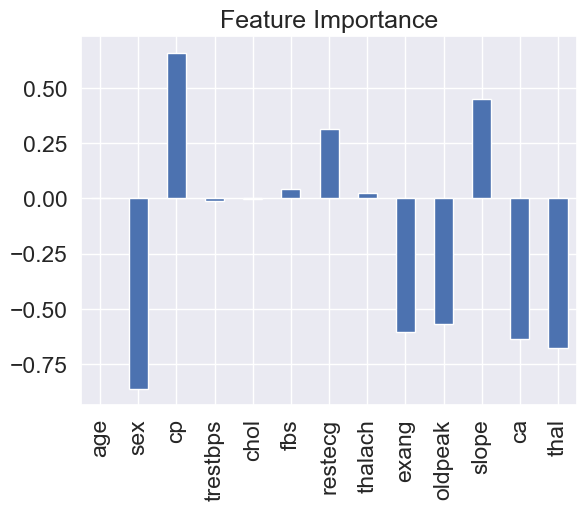

In [77]:
# visualize feature imp

feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False);

In [78]:
pd.crosstab(df["sex"],df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [79]:
pd.crosstab(df["slope"],df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slope: the slope of the peak exercise ST segment
   * Value 1: upsloping (better heart rate with exercise)
   * Value 2: flat       (normal healthy heart)
   * Value 3: downsloping  (unhealthy heart)